## Import CSV

In [2]:
#read csv
import pandas as pd
features = pd.read_csv("train_set_ohe.csv")
features.head()

,Departure_FRA,Departure_STN,Departure_SXF,Destination_FRA,Destination_STN,Destination_SXF,Price_Dev_Cat_Falling,Price_Dev_Cat_Rising,Price_Dev_Cat_Steady,Request_Day,...,Same_Day_route_Flight,Is_Holiday_UK,Is_Holiday_GER,Is_School_Holiday_BER,Is_School_Holiday_FRA,Is_School_Holiday_UK,flight_unique_id_same_flight_date,Same_Day_Route_Flight_avg_price,Same_Day_Route_Flight_avg_price_utd,Same_Day_Request_route_Flight_price
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,[],0,0,1,0,0,0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,[],0,0,1,0,0,0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,...,[],0,0,1,0,0,0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,...,[],0,0,1,0,0,0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,[],0,0,1,0,0,0,0.0,0.0,0.0


## Split into Predictors and Response Variable

In [3]:
features = features[["Departure_FRA", "Departure_STN", "Departure_SXF", "Destination_FRA", "Destination_STN", "Destination_SXF", "Price_Dev_Cat_Falling", 
                                  "Price_Dev_Cat_Rising", "Price_Dev_Cat_Steady", "Price_In_Eur",
                                  "Price_Dev", "Price_Dev_Three_Days", "Same_Day_Request_route_Flight_price",
                                  "Request_Month", "Request_Time", "Request_Day", "Flight_Day", "Departure_hour",
                                  "Hours_to_Flight", "Request_Count", "Request_Count_Sum", "Last_Request_Bool", "Is_Holiday_UK", "Is_Holiday_GER",
                                  "Is_School_Holiday_BER", "Is_School_Holiday_FRA", "Is_School_Holiday_UK", "buy"]]
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83624 entries, 0 to 83623
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Departure_FRA                        83624 non-null  float64
 1   Departure_STN                        83624 non-null  float64
 2   Departure_SXF                        83624 non-null  float64
 3   Destination_FRA                      83624 non-null  float64
 4   Destination_STN                      83624 non-null  float64
 5   Destination_SXF                      83624 non-null  float64
 6   Price_Dev_Cat_Falling                83624 non-null  float64
 7   Price_Dev_Cat_Rising                 83624 non-null  float64
 8   Price_Dev_Cat_Steady                 83624 non-null  float64
 9   Price_In_Eur                         83624 non-null  float64
 10  Price_Dev                            83624 non-null  float64
 11  Price_Dev_Three_Days        

In [4]:
import numpy as np

# Save labels in y
y = features['buy']

# remove labels from the features dataset
features = features.drop(['buy'], axis=1)

In [31]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83624 entries, 0 to 83623
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Departure_FRA                        83624 non-null  float64
 1   Departure_STN                        83624 non-null  float64
 2   Departure_SXF                        83624 non-null  float64
 3   Destination_FRA                      83624 non-null  float64
 4   Destination_STN                      83624 non-null  float64
 5   Destination_SXF                      83624 non-null  float64
 6   Price_Dev_Cat_Falling                83624 non-null  float64
 7   Price_Dev_Cat_Rising                 83624 non-null  float64
 8   Price_Dev_Cat_Steady                 83624 non-null  float64
 9   Price_In_Eur                         83624 non-null  float64
 10  Price_Dev                            83624 non-null  float64
 11  Price_Dev_Three_Days        

## Split into Train and Test Set and PCA

In [5]:
# split the dataset into training and test sets
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(features, y, test_size= 0.25, random_state=42, shuffle=True, stratify=y)

Try to reduce execution time with PCA

In [10]:
# reduced feature space to 18 with PCA
from sklearn.decomposition import PCA
pca2 = PCA(n_components=18)
pca2.fit(trainX)
trainX_reduced=pca2.transform(trainX)
testX_reduced=pca2.transform(testX)
print(trainX_reduced.shape)
print(testX_reduced.shape)

(62718, 18)
(20906, 18)


In [17]:
print('Training Features Shape:', trainX.shape)
print('Training Labels Shape:', trainY.shape)
print('Testing Features Shape:', testX.shape)
print('Testing Labels Shape:', testY.shape)

Training Features Shape: (62718, 27)
Training Labels Shape: (62718,)
Testing Features Shape: (20906, 27)
Testing Labels Shape: (20906,)


## Fit Model with Training Data

In [6]:
# import the RandomForestClassifier library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Instantiate model with 1000 decision trees
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [7]:
# fit model to the training data and save the predicted labels into testY_pred
rfc.fit(trainX, trainY)
testY_pred = rfc.predict(testX)

In [8]:
#print the accuracy score
accuracy_score(testY_pred, testY)

0.8954845498899837

In [9]:
# print the classification report
print(classification_report(testY, testY_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94     16227
           1       0.87      0.62      0.73      4679

    accuracy                           0.90     20906
   macro avg       0.89      0.80      0.83     20906
weighted avg       0.89      0.90      0.89     20906



The model is already delivering relatively good results. 

In [11]:
rfc.fit(trainX_reduced, trainY)
testY_pred_reduced = rfc.predict(testX_reduced)

In [12]:
accuracy_score(testY_pred_reduced, testY)

0.8854395867215153

In [13]:
print(classification_report(testY, testY_pred_reduced))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     16227
           1       0.85      0.59      0.70      4679

    accuracy                           0.89     20906
   macro avg       0.87      0.78      0.81     20906
weighted avg       0.88      0.89      0.88     20906



Execution time and precision got worse with the reduced dataset.

## Hyperparameter Tuning

I use RandomizedSearchCV and GridSearchCV for hyperparameter tuning. To narrow down which values we should consider for GridSearchCV, I use RandomizedSearchCV. Random Search CV iterates over a grid of random parameters. After execution, the parameters achieving the best accuracy can be printed out.

### Random Search CV

In [14]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rfc = RandomForestClassifier()

rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)

rfc_random.fit(trainX, trainY)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  26.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  26.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  26.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 1.4min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 1.4min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 1.4min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rfc_random.best_params_


{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
rfc_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=1000)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000, max_depth=50, bootstrap=False, max_features='auto', min_samples_leaf=1, min_samples_split=2)

In [34]:
rfc.fit(trainX, trainY)
testY_pred = rfc.predict(testX)

In [35]:
accuracy_score(testY_pred, testY)

0.9039510188462643

In [37]:
print(classification_report(testY, testY_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     16227
           1       0.87      0.67      0.76      4679

    accuracy                           0.90     20906
   macro avg       0.89      0.82      0.85     20906
weighted avg       0.90      0.90      0.90     20906



Recall and f1-score values for 1 are now better than before.

### Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [False],
    'max_depth': [30, 40, 50, 60],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [800, 1000, 1200]
}

rfc = RandomForestClassifier()


grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 2)

In [ ]:
grid_search.fit(trainX, trainY)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=800; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=800; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=800; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=1000; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=1000; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators=1000; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=1, n_estimators

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
108 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [False], 'max_depth': [30, 40, 50, 60],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [800, 1000, 1200]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [39]:
rfc = RandomForestClassifier(bootstrap = False, max_depth=50, max_features='auto', min_samples_leaf=1, min_samples_split=2, n_estimators=800)

rfc.fit(trainX, trainY)
testY_pred = rfc.predict(testX)

In [40]:
accuracy_score(testY, testY_pred)

0.9039031856883192

In [41]:
print(classification_report(testY, testY_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     16227
           1       0.87      0.67      0.76      4679

    accuracy                           0.90     20906
   macro avg       0.89      0.82      0.85     20906
weighted avg       0.90      0.90      0.90     20906



## Monetäres Gütemaß

In [19]:
# The model quality evaluation function expects a Pandas dataframe with at least the following columns:
# Request_Date          int64
# flight_unique_id     object
# Price               float64
# buy                    bool

def model_quality_evaluation(df):
    # Make a copy of the provided dataframe as to not modify the original.
    df = df.copy()

    # Convert 'Price' to whole cents and store as integers to avoid floating point errors.
    df['Price'] = df['Price'] * 100
    df['Price'] = df['Price'].astype(int)

    # Initialize a variable that stores the sum of all our balances.
    sum_balances = 0

    # Get a list of all 'flight_unique_id'.
    flight_unique_ids = df['flight_unique_id'].unique()

    # Iterate over all 'flight_unique_id'.
    for flight_unique_id in flight_unique_ids:
        # Get a subset of the data for the specified 'flight_unique_id'.
        df_subset = df[df['flight_unique_id'] == flight_unique_id]

        # Get all request dates except for the latest request date before departure.
        # At the latest request date before departure we need to buy a ticket anyway,
        # so we don't care about this specific request date.
        request_dates = df_subset[df_subset['Request_Date'] != df_subset['Request_Date'].max()]

        # Make sure request dates are sorted in descending order.
        request_dates.sort_values(by='Request_Date', ascending=False, inplace=True)

        # Get the ticket price from the latest request date before departure,
        # because we certainly have to buy a ticket at this date.
        last_buying_price = df_subset[df_subset['Request_Date'] == df_subset['Request_Date'].max()]['Price'].values[0]

        # Iterate over the remaining request dates
        for _, row in request_dates.iterrows():
            # and check wether the model wants to buy a ticket at the specific request date.
            if(row['buy'] == 1):
                # If the model decides to buy a ticket the last buying price is set to the
                # price point of this request date and the balance doesn't change.
                last_buying_price = row['Price']
            else:
                # If the models decides to not buy a ticket the balance equals the
                # the current ticket price minus the last buying price.
                current_price = row['Price']
                balance = current_price - last_buying_price

                # The balance is added to the sum of all balances.
                sum_balances = sum_balances + balance

    # Return the sum of all our previously calculated balances.
    return sum_balances / 100

In [18]:
from sklearn.model_selection import StratifiedKFold
import itertools

train_set_or = pd.read_csv("train_set.csv")
train_set = pd.read_csv("train_set_ohe.csv")

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
combinations = {}

#  RandomForestClassifier(n_estimators = 1000, max_depth=50, bootstrap=False, max_features='auto', min_samples_leaf=1, min_samples_split=2)
params = {
    "bootsrap": False,
    "n_estimators": [800, 1000, 1200],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 4, 8],
    "max_depth": 50,
    "max_features": "auto",
}

for param in itertools.product(
    params["n_estimators"], params["min_samples_split"], params["min_samples_leaf"]
):
    clf = RandomForestClassifier(
        max_depth=50,
        max_features="auto",
        min_samples_leaf=param[2],
        min_samples_split=param[1],
        n_estimators=param[0]
    )
    money_scores = []
    # for each fold create a dataframe
    for train_index, test_index in skf.split(features, y):  # split() return index of each fold
        # get each fold train, test fold with index index
        x_train_fold, x_test_fold = features[train_index], features[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        clf.fit(x_train_fold, y_train_fold)
        y_pred = clf.predict(x_test_fold)

        X_train_1 = train_set_or.loc[test_index]
        X_train_1 = X_train_1.reset_index(drop=True)
        df = pd.DataFrame()
        df["buy"] = y_pred
        df["flight_unique_id"] = X_train_1["flight_unique_id"]
        df["Request_Date"] = X_train_1["Request_Date"]
        df["Price"] = X_train_1["Price_In_Eur"]
        # eval with custom func and append
        score = model_quality_evaluation(df)
        money_scores.append(score)

    combinations[",".join(str(x) for x in param)] = money_scores


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/

In [19]:
first = True
maxMoney = 0
minMoney = 0
maxParam = ""
allMoney = []
for key, value in combinations.items():
  allMoney.extend(value)
  if first:
    maxMoney = max(value)
    minMoney = min(value)
    moneyParam = key
    first = False
  if max(value) > maxMoney:
    maxMoney = max(value)
    maxParam = key
  if min(value) < minMoney:
    minMoney = min(value)

# Print the output.
print("Maximum Money That can be obtained from this model is:", maxMoney)
print("\nMinimum Money:", minMoney)
print("\nOverall Money:", np.mean(allMoney))
print("\nStandard Deviation is:", np.std(allMoney))
print("\nParams for Maximum Money:", maxParam, "(max_depth, min_samples_split, min_samples_leaf)")
print("\nAll combinations:", combinations)
print("\nList of possible accuracy:", allMoney)


Maximum Money That can be obtained from this model is: -165393.79

Minimum Money: -380594.58

Overall Money: -286253.03792592586

Standard Deviation is: 61850.889747193825

Params for Maximum Money:  (max_depth, min_samples_split, min_samples_leaf)

All combinations: {'30,2,1': [-200444.02, -165393.79, -200981.0, -191700.9, -206467.12], '30,2,4': [-294537.44, -270305.32, -300777.17, -308654.27, -296862.86], '30,2,8': [-360891.93, -328237.31, -368095.73, -376238.08, -347141.1], '30,4,1': [-215966.12, -186724.18, -212122.08, -215734.98, -217304.85], '30,4,4': [-294734.61, -270539.85, -300532.45, -308507.59, -294916.81], '30,4,8': [-356372.79, -325749.49, -366073.58, -377977.61, -346935.25], '30,6,1': [-224767.71, -193247.57, -231861.68, -233660.43, -226880.57], '30,6,4': [-299097.28, -273756.25, -303542.86, -313087.13, -296869.48], '30,6,8': [-359836.64, -325020.18, -364148.57, -375419.6, -341368.16], '50,2,1': [-200808.72, -165918.41, -207273.04, -192217.17, -205719.57], '50,2,4': [-298

In [47]:
from sklearn.model_selection import StratifiedKFold
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
money_scores = []

y_np = np.array(y)
features_np = np.array(features)

rfc = RandomForestClassifier(
        max_depth=50,
        max_features="auto",
        min_samples_leaf=1,
        min_samples_split=2,
        n_estimators=1000
    )

for train_index, test_index in skf.split(features_np, y_np):  # split() return index of each fold
        # get each fold train, test fold with index index
        x_train_fold, x_test_fold = features_np[train_index], features_np[test_index]
        y_train_fold, y_test_fold = y_np[train_index], y_np[test_index]
        rfc.fit(x_train_fold, y_train_fold)
        y_pred = rfc.predict(x_test_fold)

        X_train_1 = train_set_or.loc[test_index]
        X_train_1 = X_train_1.reset_index(drop=True)
        df = pd.DataFrame()
        df["buy"] = y_pred
        df["flight_unique_id"] = X_train_1["flight_unique_id"]
        df["Request_Date"] = X_train_1["Request_Date"]
        df["Price"] = X_train_1["Price_In_Eur"]
        # eval with custom func and append
        score = model_quality_evaluation(df)
        money_scores.append(score)

# Print the output.
print('List of possible money scores:', money_scores)
print('\nMean Money:',
	np.mean(money_scores))
print('\nStandard Deviation is:', np.std(money_scores))

C:\python3.10.1\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\python3.10.1\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\python3.10.1\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\python3.10.1\

List of possible money scores: [-203909.1, -167363.74, -198529.13, -194726.21, -203196.54]

Mean Money: -193544.944

Standard Deviation is: 13507.494047931472


## Classification Report with the best parameters

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rfc = RandomForestClassifier(n_estimators = 1000, max_depth=50, bootstrap=False, max_features='auto', min_samples_leaf=1, min_samples_split=2)
rfc.fit(trainX, trainY)
testY_pred = rfc.predict(testX)

In [49]:
accuracy_score(testY, testY_pred)

0.9041423514780446

In [50]:
confusion_matrix(testY, testY_pred)

array([[15744,   483],
       [ 1521,  3158]], dtype=int64)

In [53]:
print(classification_report(y_true = testY, y_pred = testY_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     16227
           1       0.87      0.67      0.76      4679

    accuracy                           0.90     20906
   macro avg       0.89      0.82      0.85     20906
weighted avg       0.90      0.90      0.90     20906



### Predict test_set.csv

In [54]:
test_set_ohe = pd.read_csv("test_set_ohe.csv")
test_set = pd.read_csv("test_set.csv")

trainX, testX, trainY, testY = train_test_split(features, y, test_size= 0.25, random_state=42, shuffle=True, stratify=y)

rfc = RandomForestClassifier(n_estimators = 1000, max_depth=50, bootstrap=False, max_features='auto', min_samples_leaf=1, min_samples_split=2)
rfc.fit(trainX, trainY)

RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=1000)

In [55]:
testY_pred = rfc.predict(test_set_ohe)
test_set["buy"] = testY_pred
test_set.to_csv("test_set_predicted_randomForest.csv", index=False)

### Compare the models 

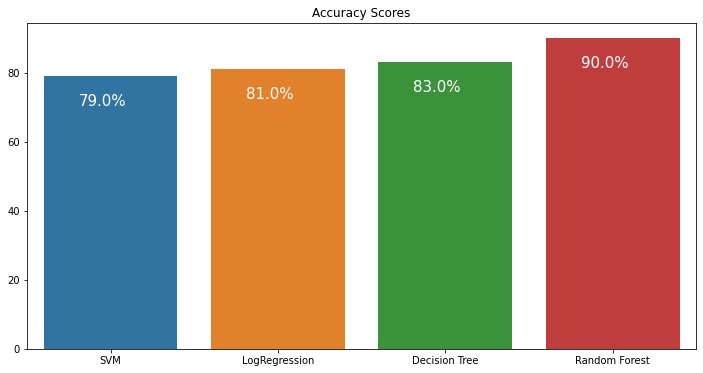

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

models = ["SVM", "LogRegression", "Decision Tree", "Random Forest"]
accuracy = [79, 81, 83, 90]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=models, y = accuracy)
ax.set(title="Accuracy Scores")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}%', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=15)

plt.show()

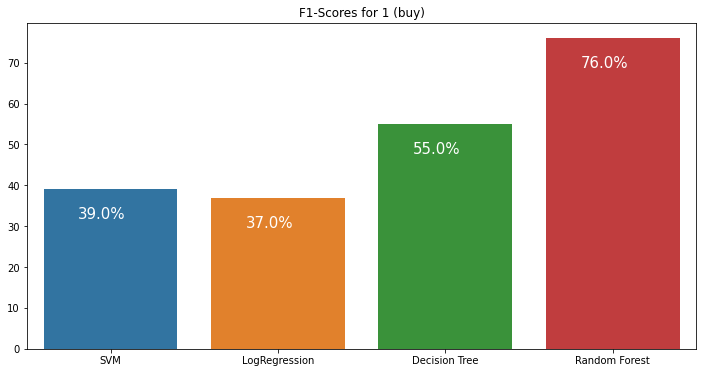

In [65]:
#F1-score to predict buy
models = ["SVM", "LogRegression", "Decision Tree", "Random Forest"]
accuracy = [39, 37, 55, 76]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=models, y = accuracy)
ax.set(title="F1-Scores for 1 (buy)")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}%', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=15)

plt.show()
